# PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

1. Data Understanding & Cleaning: 
A. Read ‘vehicle.csv’ and save as DataFrame. 

In [2]:
df_vehicle = pd.read_csv('vehicle.csv')
df_vehicle.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [3]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [4]:
df_vehicle.shape


(846, 19)

In [5]:
percent_missing = df_vehicle.isnull().sum() * 100 / len(df_vehicle)
missing_value_df = pd.DataFrame({'column_name': df_vehicle.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
compactness                                  compactness         0.000000
circularity                                  circularity         0.591017
distance_circularity                distance_circularity         0.472813
radius_ratio                                radius_ratio         0.709220
pr.axis_aspect_ratio                pr.axis_aspect_ratio         0.236407
max.length_aspect_ratio          max.length_aspect_ratio         0.000000
scatter_ratio                              scatter_ratio         0.118203
elongatedness                              elongatedness         0.118203
pr.axis_rectangularity            pr.axis_rectangularity         0.354610
max.length_rectangularity      max.length_rectangularity         0.000000
scaled_variance                          scaled_variance         0.354610
scaled_variance.1                      scaled_variance.1         0.236407
scaled_radius_of_gyration      scaled_radius_of_gyration         0.236407
scaled_radius_of_gyration.1  scaled_radius_of_gyration.1         0.472813
skewness_about                            skewness_about         0.709220
skewness_about.1                        skewness_about.1         0.118203
skewness_about.2                        skewness_about.2         0.118203
hollows_ratio                              hollows_ratio         0.000000
class                                              class         0.000000

Visualize a Pie-chart and print percentage of values for variable ‘class’

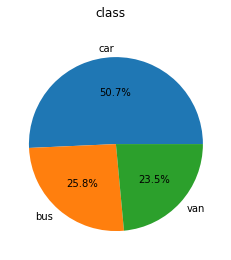

In [6]:
plt.pie(df_vehicle['class'].value_counts(), autopct = '%.1f%%',labels=list(df_vehicle['class'].value_counts().index));
plt.suptitle('class')
plt.show()


In [7]:
#The data is not distrubuted equally across the 3 types of classes. 
#Approximately Half of the data points are of type "car" and remaining from the types "bus" and "van" in appox. equal proportions.

  

#one_hot = pd.get_dummies(df_vehicle['class'])
#one_hot = one_hot.add_prefix('class')
#df_vehicle = df_vehicle.join(one_hot)
#df_vehicle.head()

In [8]:
df_vehicle_ = df_vehicle.drop('class',axis=1)

In [9]:
df_vehicle_.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [10]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df_vehicle_)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",df_imputed)




After performing imputation
 [[ 95.  48.  83. ...  16. 187. 197.]
 [ 91.  41.  84. ...  14. 189. 199.]
 [104.  50. 106. ...   9. 188. 196.]
 ...
 [106.  54. 101. ...   4. 187. 201.]
 [ 86.  36.  78. ...  25. 190. 195.]
 [ 85.  36.  66. ...  18. 186. 190.]]


In [11]:
df = pd.DataFrame(df_imputed,columns=[ 'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

Check for duplicate rows in the data and impute with correct approach.

In [12]:
# Check for duplicate data
df.duplicated().sum()


0

# 2. Data Preparation:


A. Split data into X and Y.(Train and Test optional)

B. Standardize the Data.

In [13]:
X = df
y = df_vehicle[['class']]

print("shape of independant data: ", X.shape)
print("shape of dependant data: ", y.shape)

shape of independant data:  (846, 18)
shape of dependant data:  (846, 1)


In [14]:
# encoding the class attribute.
y.replace({'car':0,'bus':1,'van':2},inplace=True)

In [15]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.508796              0.057491      0.269777   
1    -0.325470    -0.626505              0.120944     -0.835966   
2     1.254193     0.833168              1.516917      1.196210   
3    -0.082445    -0.626505             -0.005963     -0.298037   
4    -1.054545    -0.139948             -0.767403      1.076670   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.306579                 0.311542      -0.205821   
1             -0.595507                 0.094079      -0.597077   
2              0.545744                 0.311542       1.148529   
3              0.165327                 0.094079      -0.747561   
4              5.237557                 9.444962      -0.597077   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136570               -0.224944                   0.758332   
1       0.520843               -0.610954                  -0.344578   
2      -1.144341                0.933086                   0.689401   
3       0.648935               -0.610954                  -0.344578   
4       0.520843               -0.610954                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.402275          -0.344841                   0.285812   
1        -0.593442          -0.622348                  -0.513516   
2         1.095198           1.104988                   1.392573   
3        -0.912053          -0.741279                  -1.466561   
4         1.668698          -0.650665                   0.408785   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327777       -0.074607          0.380544   
1                    -0.060372        0.537193          0.156469   
2                     0.073331        1.556859         -0.403720   
3                    -1.263695       -0.074607         -0.291682   
4                     7.293271        0.537193         -0.179644   

   skewness_about.2  hollows_ratio  
0         -0.313482       0.183957  
1          0.011426       0.452977  
2         -0.151028       0.049447  
3          1.635964       1.529056  
4         -1.450659      -1.699181

In [16]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=3)

# 3. Model Building: 


A. Train a base Classification model using SVM.

In [17]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svm_model_1 = svm.SVC(gamma=0.025, C=3, kernel= 'linear')
svm_model_1.fit(X_train , y_train)

SVC(C=3, gamma=0.025, kernel='linear')

B. Print Classification metrics for train data.

In [18]:
y_predict_1 = svm_model_1.predict(X_test)

train_score_1 = svm_model_1.score(X_train,y_train)
test_score_1 = svm_model_1.score(X_test, y_test)

print("SVM_model_1 score for train set:", train_score_1*100)
print("SVM_model_1 score for test set:", test_score_1*100)

SVM_model_1 score for train set: 97.46621621621621
SVM_model_1 score for test set: 95.66929133858267


In [19]:
target_names = ['car', 'bus', 'van']
print("\nClassification Report:\n", classification_report(y_test, y_predict_1, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

         car       0.98      0.96      0.97       123
         bus       0.94      0.94      0.94        71
         van       0.92      0.97      0.94        60

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254



Apply PCA on the data with 10 components.?

Before applying PCA clustering it is necessary that we check for outliers and remove them.

<AxesSubplot:>

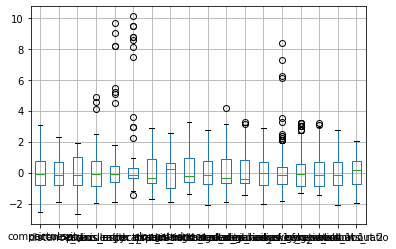

In [20]:
XScaled.boxplot()



In [21]:
#18 columns are  plotted and its so crowded. still we could see there are outliers in certain features,
#which should be treated for  removal of outliers.

In [22]:
# we define outliers by using Inter Quantile range. 
# Data_point > (Q3 * 1.5) is said to be outlier where Q3 is 75% Quantile !

# finding the IQR for each of the numerical columns
def check_outliers(XScaled):
    vData_num = XScaled.loc[:,]
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(XScaled)

No. of outliers in radius_ratio: 3
No. of outliers in pr.axis_aspect_ratio: 8
No. of outliers in max.length_aspect_ratio: 13
No. of outliers in scaled_variance: 1
No. of outliers in scaled_variance.1: 2
No. of outliers in scaled_radius_of_gyration.1: 15
No. of outliers in skewness_about: 12
No. of outliers in skewness_about.1: 2


No of attributes with outliers are : 8


In [23]:
# There  8 attributes which have outliers.
#Also,the no.of outliers are very low(< 20) w.r.t the total datapoints (846).
#Hence, we will replace them with the median of the respective attributes.

In [24]:
df_vehicle_clean = XScaled

In [25]:
# to replace with median we will loop through each column in the dataframe

for col in df_vehicle_clean.columns[:-1]:
    Q1 = df_vehicle_clean[col].quantile(0.25)
    Q3 = df_vehicle_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_value = Q1 - (1.5 * IQR)
    upper_value = Q3 + (1.5 * IQR)
    
    df_vehicle_clean.loc[(df_vehicle_clean[col]< lower_value) | ( df_vehicle_clean[col] > upper_value), col] = df_vehicle_clean[col].median()

In [26]:
check_outliers(df_vehicle_clean)



No of attributes with outliers are : 0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'compactness'),
  Text(2, 0, 'circularity'),
  Text(3, 0, 'distance_circularity'),
  Text(4, 0, 'radius_ratio'),
  Text(5, 0, 'pr.axis_aspect_ratio'),
  Text(6, 0, 'max.length_aspect_ratio'),
  Text(7, 0, 'scatter_ratio'),
  Text(8, 0, 'elongatedness'),
  Text(9, 0, 'pr.axis_rectangularity'),
  Text(10, 0, 'max.length_rectangularity'),
  Text(11, 0, 'scaled_variance'),
  Text(12, 0, 'scaled_variance.1'),
  Text(13, 0, 'scaled_radius_of_gyration'),
  Text(14, 0, 'scaled_radius_of_gyration.1'),
  Text(15, 0, 'skewness_about'),
  Text(16, 0, 'skewness_about.1'),
  Text(17, 0, 'skewness_about.2'),
  Text(18, 0, 'hollows_ratio')])

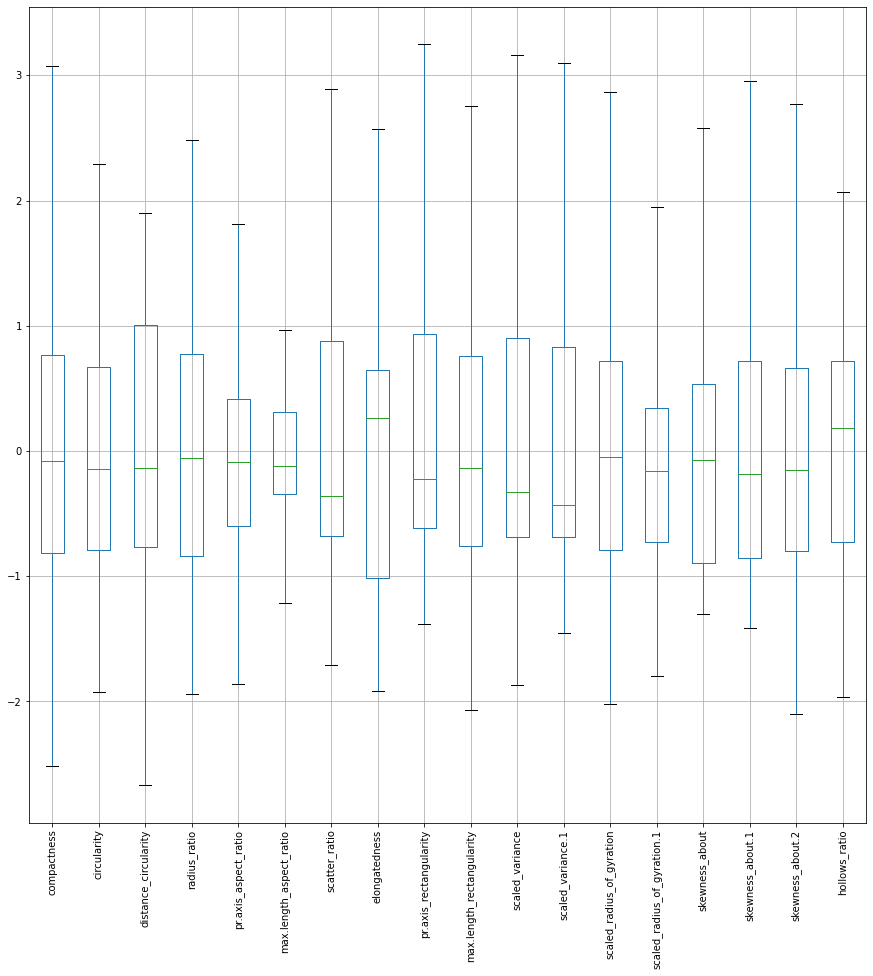

In [27]:
plt.figure(figsize= (15,15))
df_vehicle_clean.boxplot()
plt.xticks(rotation = 90)

In [28]:
# Check for correlation of variable
df_vehicle_clean.corr(method='pearson')

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.692741              0.792419   
circularity                     0.692741     1.000000              0.798615   
distance_circularity            0.792419     0.798615              1.000000   
radius_ratio                    0.723777     0.641114              0.799847   
pr.axis_aspect_ratio            0.195129     0.197513              0.247111   
max.length_aspect_ratio         0.499928     0.552733              0.665384   
scatter_ratio                   0.812999     0.860340              0.907757   
elongatedness                  -0.788647    -0.828716             -0.912704   
pr.axis_rectangularity          0.813437     0.857871              0.895803   
max.length_rectangularity       0.676143     0.965754              0.774811   
scaled_variance                 0.772311     0.815189              0.873097   
scaled_variance.1               0.810684     0.844442              0.888063   
scaled_radius_of_gyration       0.585339     0.936122              0.706139   
scaled_radius_of_gyration.1    -0.249401     0.079163             -0.234076   
skewness_about                  0.196574     0.137671              0.099782   
skewness_about.1                0.157198    -0.008412              0.266181   
skewness_about.2                0.298048    -0.112606              0.147905   
hollows_ratio                   0.365552     0.038354              0.334637   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.723777              0.195129   
circularity                      0.641114              0.197513   
distance_circularity             0.799847              0.247111   
radius_ratio                     1.000000              0.652133   
pr.axis_aspect_ratio             0.652133              1.000000   
max.length_aspect_ratio          0.461059              0.148919   
scatter_ratio                    0.775128              0.196839   
elongatedness                   -0.829327             -0.300783   
pr.axis_rectangularity           0.748371              0.163183   
max.length_rectangularity        0.581791              0.150505   
scaled_variance                  0.791588              0.209640   
scaled_variance.1                0.769103              0.200477   
scaled_radius_of_gyration        0.555172              0.151762   
scaled_radius_of_gyration.1     -0.389812             -0.318690   
skewness_about                   0.036577             -0.055916   
skewness_about.1                 0.182074             -0.024705   
skewness_about.2                 0.404102              0.399931   
hollows_ratio                    0.488645              0.414940   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812999   
circularity                                 0.552733       0.860340   
distance_circularity                        0.665384       0.907757   
radius_ratio                                0.461059       0.775128   
pr.axis_aspect_ratio                        0.148919       0.196839   
max.length_aspect_ratio                     1.000000       0.491563   
scatter_ratio                               0.491563       1.000000   
elongatedness                              -0.504038      -0.973397   
pr.axis_rectangularity                      0.488753       0.992085   
max.length_rectangularity                   0.642713       0.810658   
scaled_variance                             0.403117       0.964146   
scaled_variance.1                           0.466778       0.983795   
scaled_radius_of_gyration                   0.397505       0.800928   
scaled_radius_of_gyration.1                -0.334128       0.010510   
skewness_about                              0.080716       0.062686   
skewness_about.1                            0.141116       0.213200   
skewness_about.2                            0.

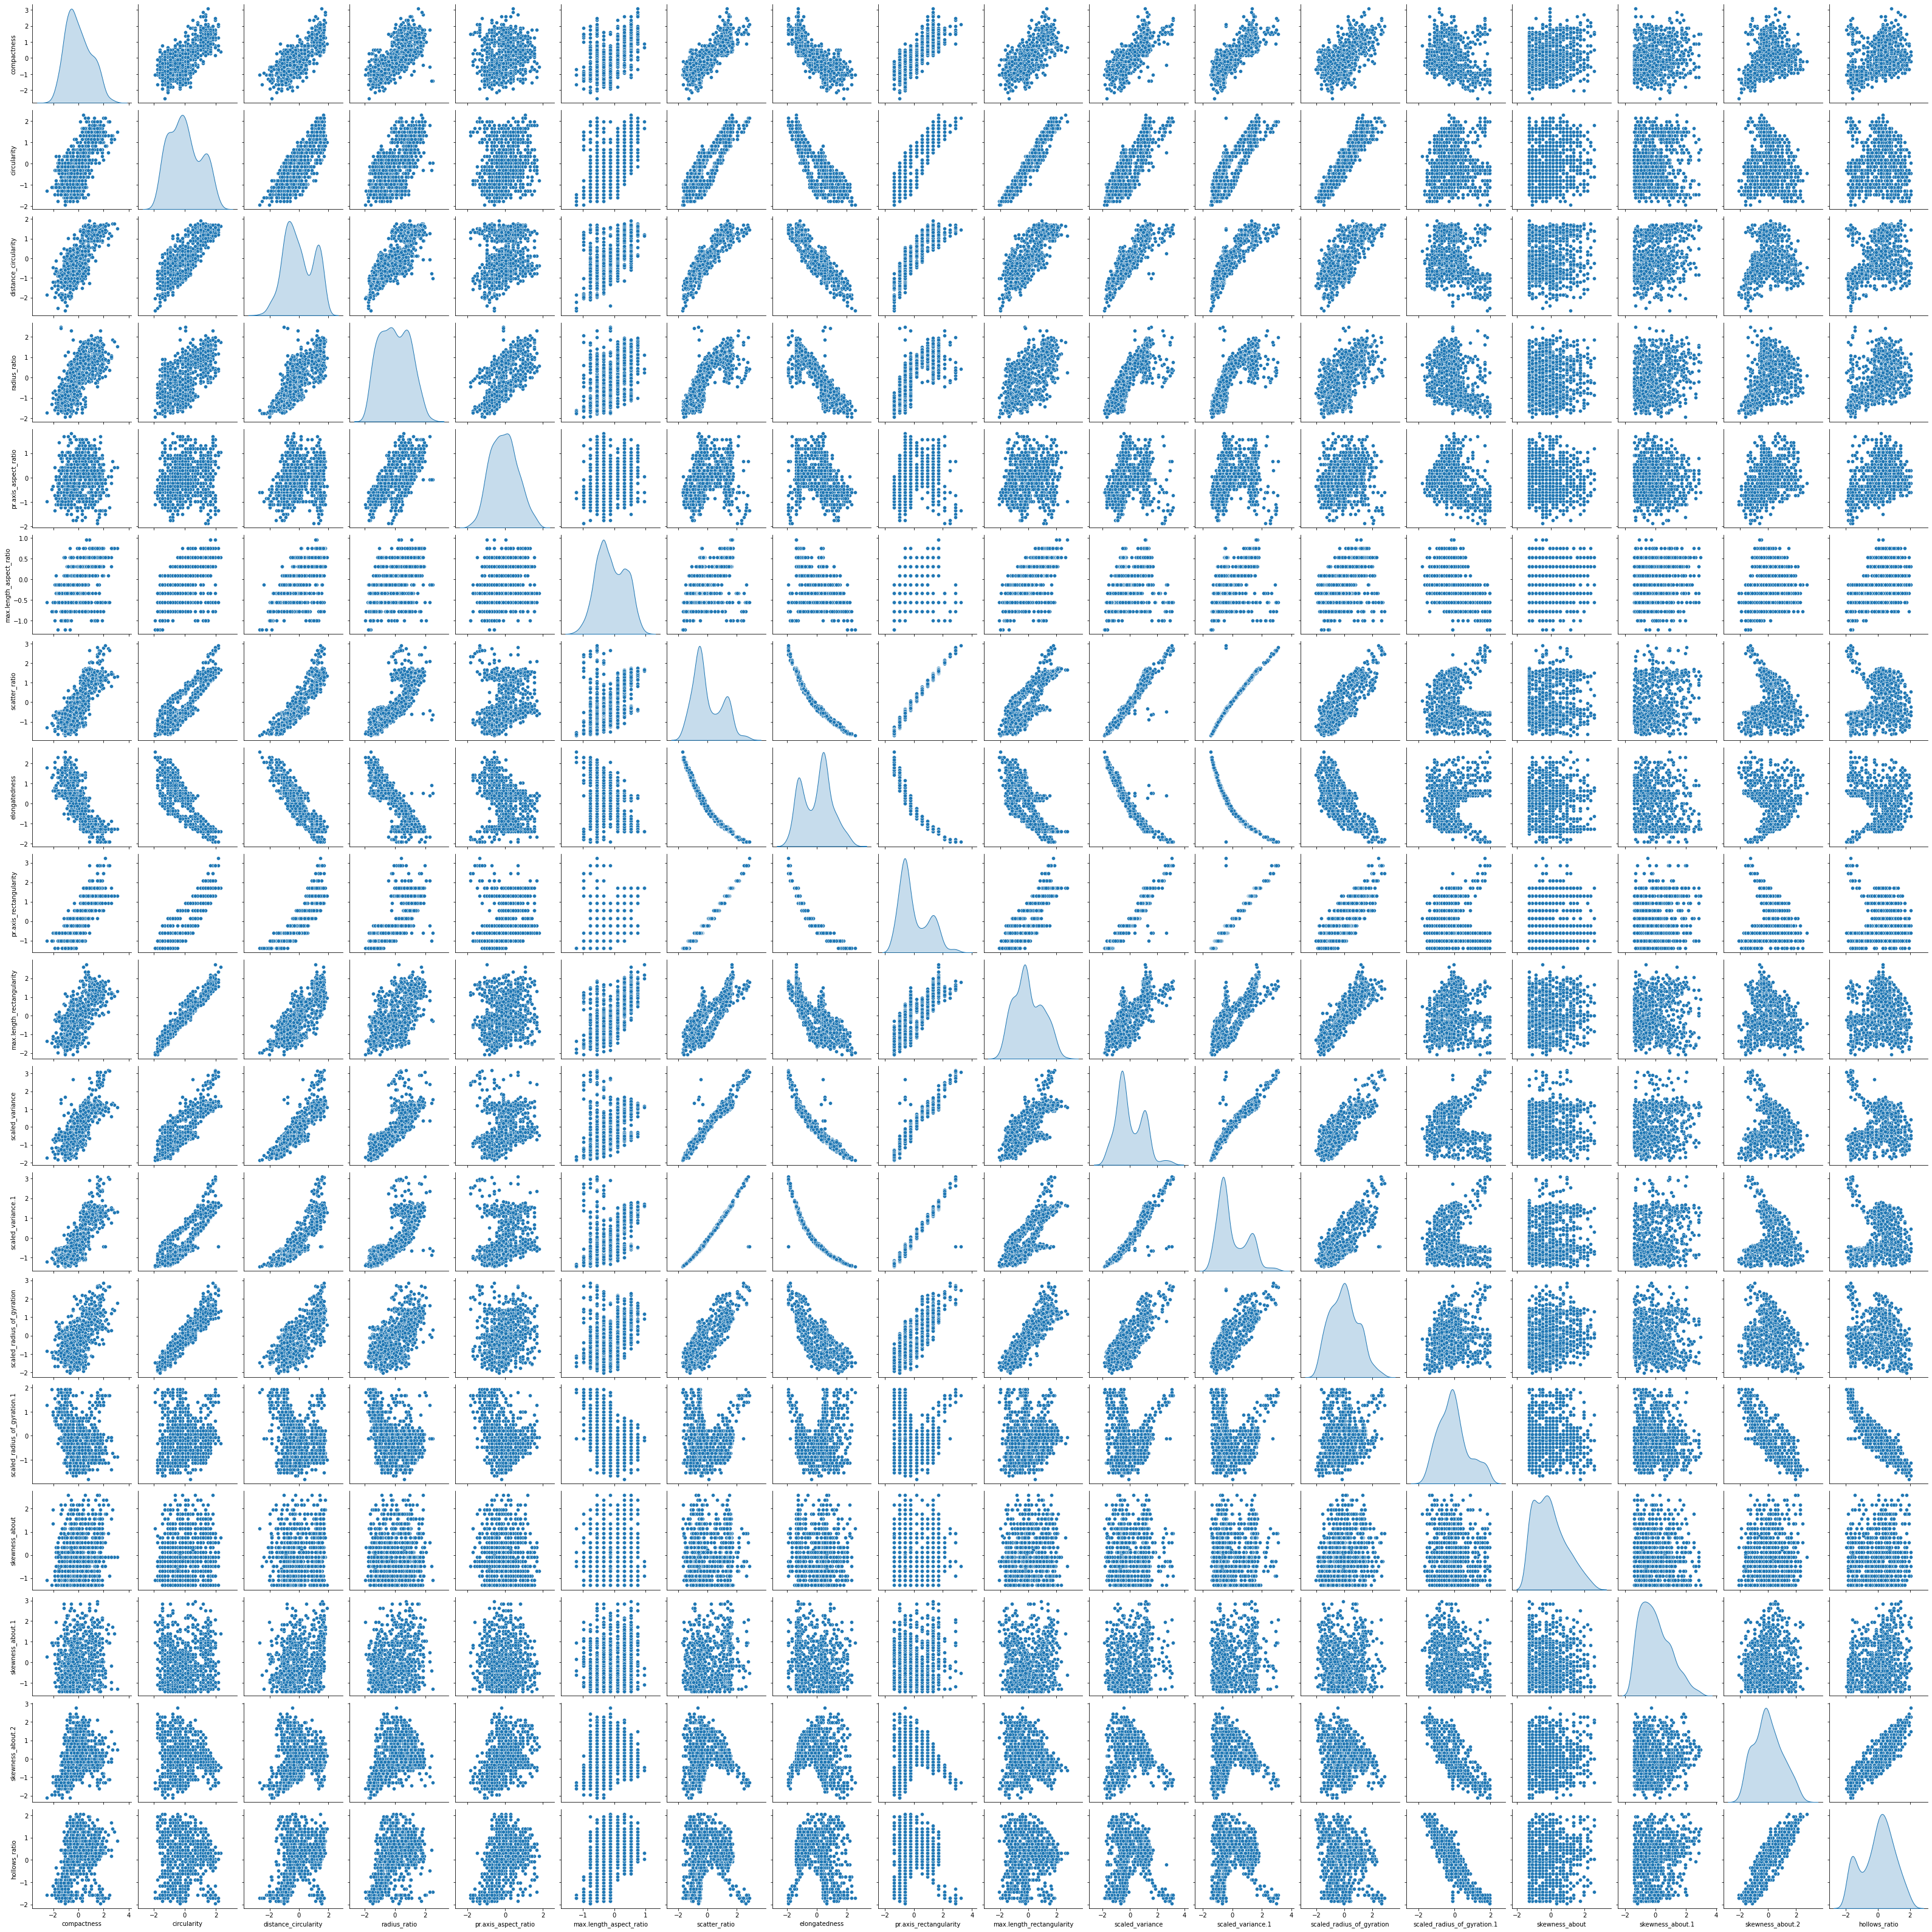

In [29]:
sns.pairplot(df_vehicle_clean,diag_kind='kde')

In [30]:
df_vehicle_clean.dtypes

compactness                    float64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity      float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                  float64
dtype: object

In [31]:
#outliers are removed. Datapoints are scaled.most of the datapoints  look to be right tailed in distribution.
#some features are multimodal as they show more than one peak value.

In [32]:
# PCA
# Step 1 - Create covariance matrix

covMatrix = np.cov(df_vehicle_clean,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.69356106  0.79335662  0.69760892  0.13931936  0.22453393
   0.81396104 -0.78958033  0.81439967  0.67694334  0.76521371  0.80179661
   0.5860317  -0.20611992  0.18357512  0.15555648  0.29840068  0.36598446]
 [ 0.69356106  1.00118343  0.79956044  0.61793456  0.14102154  0.24825063
   0.86135821 -0.82969655  0.85888644  0.96689712  0.80769712  0.83518376
   0.93722987  0.06542475  0.12856699 -0.00832406 -0.1127389   0.0383995 ]
 [ 0.79335662  0.79956044  1.00118343  0.77092819  0.17643354  0.29884578
   0.90883154 -0.91378418  0.89686274  0.77572837  0.8650733   0.87832687
   0.70697452 -0.19345431  0.09318391  0.26340145  0.14807985  0.33503256]
 [ 0.69760892  0.61793456  0.77092819  0.92789861  0.448249    0.19935393
   0.747103   -0.79934214  0.72131345  0.56075601  0.75506295  0.73230172
   0.53509931 -0.31014921  0.03288426  0.17345382  0.38949155  0.47097747]
 [ 0.13931936  0.14102154  0.17643354  0.448249    0.50917377  0.04769821
   0.14054048 -0.21475472  0.11651

In [33]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.77601692e-01 -1.20715490e-01 -4.77122699e-02  1.50786553e-01
  -3.90756707e-02 -4.10817815e-01 -3.74564188e-01 -6.65892598e-01
   2.90838008e-01 -1.49031862e-01 -4.29404808e-04  1.69953195e-02
   1.51322175e-02  1.04775745e-01 -2.15382468e-02 -8.75327094e-02
  -4.36950678e-02  3.18467897e-02]
 [-2.96429791e-01  1.37077079e-01 -2.02802286e-01 -2.27454747e-02
  -2.20875244e-01  2.48216530e-01 -2.08651258e-01  6.26517342e-02
   3.40135274e-03  1.38537481e-01 -7.14718056e-03 -1.77395437e-01
   6.85517945e-02  2.23226605e-02  7.38999920e-01 -1.36081853e-01
  -2.54748759e-01 -9.15263003e-02]
 [-3.06714582e-01 -6.93025362e-02  7.98214105e-02  5.40144121e-02
  -1.28195295e-01  2.77166589e-02  4.76835118e-01 -2.03867434e-02
   1.19757211e-01 -4.95024168e-01 -2.42700978e-01 -5.10806261e-01
   3.00121371e-04 -2.50590674e-01 -3.81381372e-02  1.21584735e-02
  -3.38794542e-02 -4.56207954e-02]
 [-2.62145035e-01 -2.11267550e-01  7.68977940e-03 -1.86782033e-01
   3.72129403e-01  

In [34]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.03208759  76.2755981   83.19728529  88.71804548  91.93325461
  94.86401648  96.23255808  97.49771692  98.18620552  98.61975028
  98.98999725  99.28800298  99.4977235   99.64782266  99.79165936
  99.90627918  99.98156283 100.        ]


D. Visualize Cumulative Variance Explained with Number of Components. 

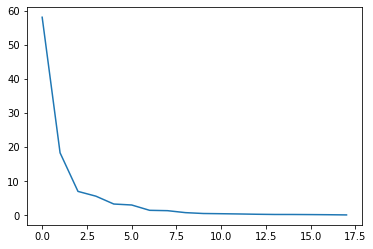

In [35]:
plt.plot(var_exp)

In [36]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 10 components here. But depending on requirement 90% variation or 5 components will also do good

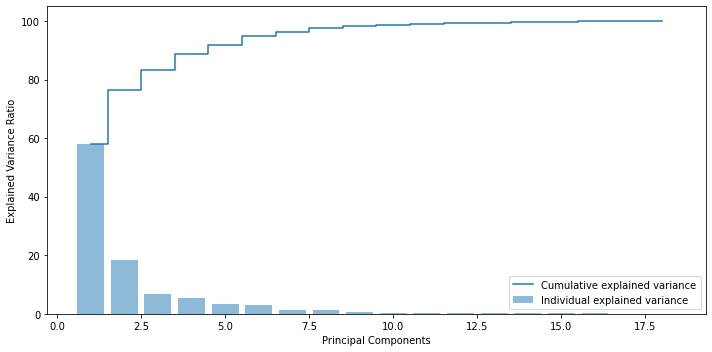

In [37]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [38]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 10 PCA dimensions (dimensionality reduction from 18 to 10)

pca = PCA(n_components=10)
data_reduced = pca.fit_transform(df_vehicle_clean)
data_reduced.transpose()

array([[ 0.33224683, -1.56852114,  3.7645719 , ...,  4.81704104,
        -3.25395221, -4.72103584],
       [-0.27859673, -0.36409259,  0.21590525, ..., -0.06570697,
        -0.97301804,  0.38513057],
       [-0.27180121, -0.05382962, -1.03964362, ..., -0.65578995,
         1.90591995,  1.23116296],
       ...,
       [-0.84582922, -0.01871451, -0.26295544, ..., -0.85328062,
         0.27390621, -0.18248062],
       [ 0.0906114 , -0.15998665,  0.29866291, ..., -0.34854038,
         0.90707068,  0.4851271 ],
       [-0.01951924, -0.49480012, -0.49782395, ...,  0.44359567,
        -0.28044152,  0.01098305]])

In [39]:
pca.components_

array([[ 0.27760169,  0.29642979,  0.30671458,  0.26214504,  0.06651868,
         0.08380201,  0.31984793, -0.31641094,  0.31684923,  0.28332647,
         0.30694027,  0.31187353,  0.27273191, -0.02626012,  0.03374797,
         0.0590043 ,  0.030878  ,  0.07493872],
       [-0.12071549,  0.13707708, -0.06930254, -0.21126755, -0.18052162,
        -0.04720377,  0.0548025 ,  0.00869248,  0.06878575,  0.12284584,
         0.05616448,  0.04869328,  0.21509286,  0.44189719, -0.02264608,
        -0.11447131, -0.54800736, -0.54634327],
       [-0.04771227, -0.20280229,  0.07982141,  0.00768978, -0.09906479,
        -0.03058478,  0.0981164 , -0.06833525,  0.1000248 , -0.20080829,
         0.11384341,  0.09618988, -0.21279332,  0.07769902, -0.41759618,
         0.77917716, -0.12619058, -0.0618937 ],
       [ 0.15078655, -0.02274547,  0.05401441, -0.18678203, -0.30487821,
         0.03598214, -0.0033835 ,  0.07254405,  0.02080904,  0.00869389,
        -0.05935697, -0.00184658, -0.01419105, -0.009

E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

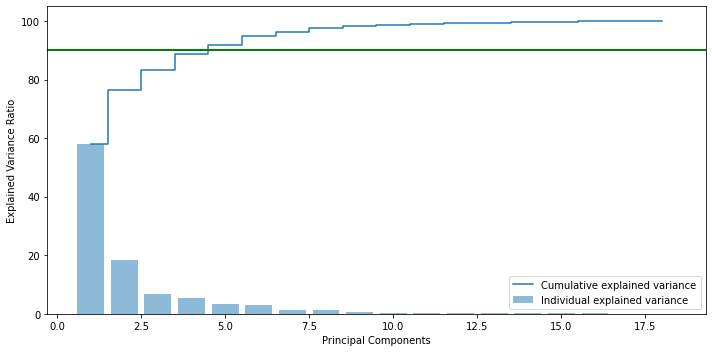

In [40]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt. axhline(y=90,linewidth=2, color='g')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')

plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


As we see from the above graph, 90% of the variation in data can be explained using 5 features.

# Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [41]:
# 5 features explain 90 % of the variance
pca_rd = PCA(n_components=5)
pca_rd.fit(XScaled)

PCA(n_components=5)

In [42]:
XScaled_pca = pd.DataFrame(pca_rd.transform(XScaled))

print("shape after dimensionality reduction:", XScaled_pca.shape)

XScaled_pca.head()

shape after dimensionality reduction: (846, 5)


0         1         2         3         4
0  0.332247 -0.278597 -0.271801 -0.263435 -0.066647
1 -1.568521 -0.364093 -0.053830  0.907031 -0.524538
2  3.764572  0.215905 -1.039644  0.852246  0.964286
3 -1.716517 -2.816198 -0.474023 -0.047198 -0.655885
4 -0.650169  1.685306 -0.122192 -0.058608  1.337780

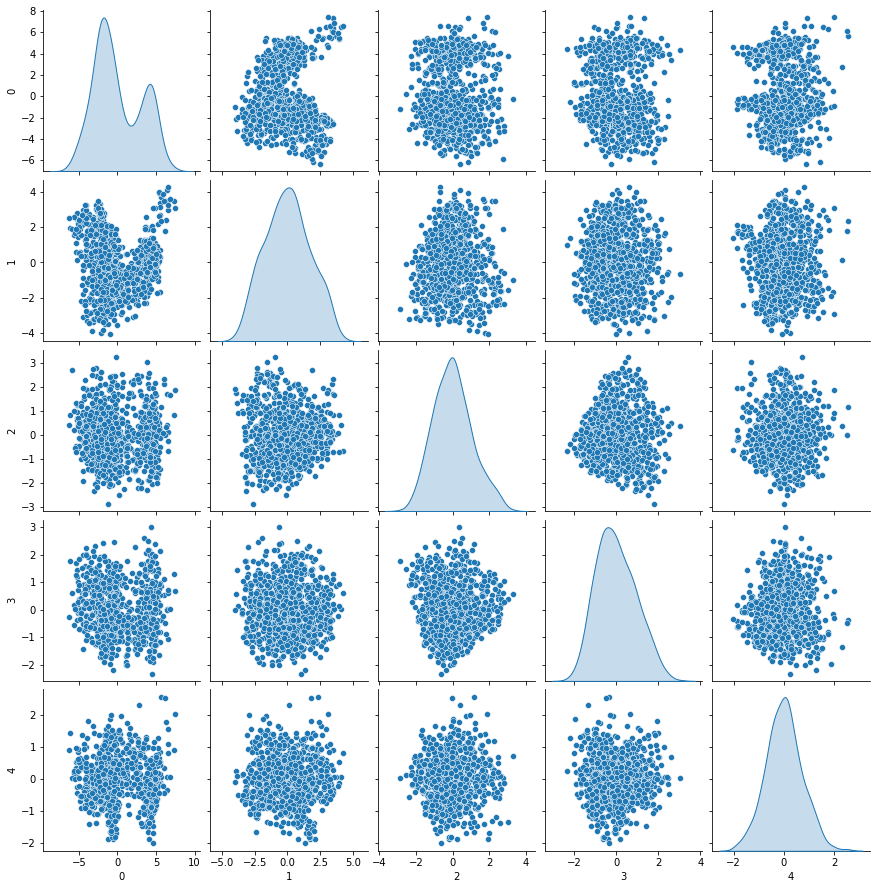

In [43]:
sns.pairplot(XScaled_pca, diag_kind='kde') 

In [44]:
#After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. 
#As most of them have cloud of data points with no linear kind of relationship.

Train SVM model on components selected from above step.

We get the best paramters as : C = 5, and selecting gamma=0.1 for rbf. Hence let us re-construct the model with these parameters.

In [45]:
svm_model_2 = svm.SVC(gamma=0.05, C=5, kernel= 'rbf')
svm_model_2.fit(X_train , y_train)

SVC(C=5, gamma=0.05)

Print Classification metrics for train data of above model and share insights. 

In [46]:
y_predict_2 = svm_model_2.predict(X_test)

train_score_2 = svm_model_2.score(X_train,y_train)
test_score_2= svm_model_2.score(X_test, y_test)

print("SVM_model_2 score for train set:", train_score_2*100)
print("SVM_model_2 score for test set:", test_score_2*100)


SVM_model_2 score for train set: 99.1554054054054
SVM_model_2 score for test set: 96.8503937007874


In [47]:
target_names = ['car', 'bus', 'van']
print("\nClassification Report:\n", classification_report(y_test, y_predict_2, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

         car       0.99      0.96      0.98       123
         bus       0.97      0.97      0.97        71
         van       0.92      0.98      0.95        60

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [48]:
#The accuracy has been improved from 95.6 to 96.85 , in test dataset even after component reduction to 5
#compared to 18 in the svm base model

# 4. Performance Improvement: 

A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [49]:
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV

c_range = range(1,11)
gamma_range = [0.001,0.025,0.05,0.04,0.03,0.1,0.5,1,10]
params = dict(C=c_range, gamma=gamma_range,kernel=['linear', 'rbf'])
model = GridSearchCV(svm.SVC(), param_grid=params, verbose=1)
model.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 11),
                         'gamma': [0.001, 0.025, 0.05, 0.04, 0.03, 0.1, 0.5, 1,
                                   10],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

B. Share best Parameters observed from above step. 

In [50]:
print("Best Hyper Parameters:\n", model.best_params_)

Best Hyper Parameters:
 {'C': 7, 'gamma': 0.025, 'kernel': 'rbf'}


C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with 
insights. 

In [51]:
svm_model_3 = svm.SVC(gamma=0.025, C=7, kernel= 'rbf')
svm_model_3.fit(X_train , y_train)

SVC(C=7, gamma=0.025)

In [52]:
y_predict_3 = svm_model_3.predict(X_test)

train_score_3 = svm_model_3.score(X_train,y_train)
test_score_3= svm_model_3.score(X_test, y_test)

print("SVM_model_3 score for train set:", train_score_3*100)
print("SVM_model_3 score for test set:", test_score_3*100)


SVM_model_3 score for train set: 98.81756756756756
SVM_model_3 score for test set: 96.8503937007874


In [53]:
target_names = ['car', 'bus', 'van']
print("\nClassification Report:\n", classification_report(y_test, y_predict_3, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

         car       0.99      0.96      0.98       123
         bus       0.97      0.97      0.97        71
         van       0.92      0.98      0.95        60

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



# The base svm model , svm_model_1 has the accuracy score of 96% accuracy with svm parameters ,C=3, gamma=0.025, kernel='linear'. After that we applied pca and reduced the feature numbers to 5 and built a model with accuracy 97%. Then again we tuned the hyperparameters of Svm classifier and got the best parameters as (C=7, gamma=0.025) and coud maintain the accuracy attained by pca. 97% accuracy is maintained.

Explain pre-requisite/assumptions of PCA. 

Principal components analysis (PCA, for short) is a variable-reduction technique that shares many similarities to exploratory factor analysis. Its aim is to reduce a larger set of variables into a smaller set of 'artificial' variables, called 'principal components', which account for most of the variance in the original variables.
It is a good practice to scale all datapoints to a single scale before performing any type of clustering.
PCA technique is used when:
You have multiple variables that should be measured at the continuous level (although ordinal variables are very frequently used).
There needs to be a linear relationship between all variables. The reason for this assumption is that a PCA is based on Pearson correlation coefficients, and as such, there needs to be a linear relationship between the variables.
 Your data should be suitable for data reduction. Effectively, you need to have adequate correlations between the variables in order for variables to be reduced to a smaller number of components.
There should be no significant outliers. Outliers are important because these can have a disproportionate influence on your results. SPSS Statistics recommends determining outliers as component scores greater than 3 standard deviations away from the mean.

Explain advantages and limitations of PCA. 

Advantages:
1.The pca techniques efficiently removes correlated features even when  hundreds features are       present.There is no correlation among them after the pca is done on the dataset.
2.The training time of the algorithms reduces significantly with less number of features.
 So, if the input dimensions are too high, then using PCA to speed up the algorithm is a           reasonable choice.
3.Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.
4.It is very hard to visualize and understand the data in high dimensions.PCA transforms a high dimensional data to low dimensional data  so that it can be visualized easily.

Limitations:
After implementing PCA on the dataset, the original features will turn into Principal Components. Principal Components are the linear combination of the original features. Principal Components are not as readable and interpretable as original features.
You must standardize your data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components.
For instance, if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.Also, for standardization, all the categorical features are required to be converted into numerical features before PCA can be applied.
Although Principal Components try to cover maximum variance among the features in a dataset, if we don’t select the number of Principal Components with care, it may miss some information as compared to the original list of features.